In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn import decomposition
from sklearn.pipeline import Pipeline
%matplotlib inline

### Nearest neighbor

In [2]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

In [3]:
print np.unique(iris_y)
print iris_X.shape

[0 1 2]
(150, 4)


In [4]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [5]:
print indices

[114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83  61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80
 123 133 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95
  20  15  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110
 124  41 148   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28
  55  75  35  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49
 136  99  82  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36
  21   9 103  67 117  47]


In [6]:
# Create and fit a nearest-neighbor classifier
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [8]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [9]:
knn.score(iris_X_test, iris_y_test)

0.90000000000000002

### Linear model: from regression to sparsity

In [10]:
diabetes = datasets.load_diabetes()
diabetes_X =  diabetes.data
diabetes_y =  diabetes.target
diabetes_X_train =  diabetes.data[:-20]
diabetes_X_test =  diabetes.data[-20:]
diabetes_y_train =  diabetes.target[:-20]
diabetes_y_test =  diabetes.target[-20:]

In [11]:
print diabetes_X_train.shape

(422, 10)


In [12]:
#from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print regr.coef_

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [14]:
# The mean square error
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)

2004.5676026898218

In [15]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship between X and y
regr.score(diabetes_X_test, diabetes_y_test)

0.58507530226905724

In [16]:
alphas = np.logspace(-4, -1, 6)
print alphas

[ 0.0001      0.00039811  0.00158489  0.00630957  0.02511886  0.1       ]


In [17]:
# Ridge regression
for alpha in alphas:
    regr = linear_model.Ridge(alpha)
    print regr.fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test)

0.585111068388
0.585207301544
0.58546775407
0.58555120365
0.583071708555
0.570589994373


In [18]:
# Lasso, set some coefficients to zero
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
             .fit(diabetes_X_train, diabetes_y_train)
             .score(diabetes_X_test, diabetes_y_test)
             for alpha in alphas]
print alphas
print scores

[ 0.0001      0.00039811  0.00158489  0.00630957  0.02511886  0.1       ]
[0.58511910691622271, 0.58524713649060489, 0.58571895391793527, 0.58730094854527415, 0.58876224183092607, 0.5828450029681681]


In [19]:
best_alpha = alphas[scores.index(max(scores))]
print best_alpha
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)
regr.coef_

0.0251188643151


array([   0.        , -212.43764548,  517.19478111,  313.77959962,
       -160.8303982 ,   -0.        , -187.19554705,   69.38229038,
        508.66011217,   71.84239008])

##### classification

In [20]:
# Logistic regression
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [21]:
print logistic.predict(iris_X_test)
print iris_y_test

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


In [22]:
# Exercise: Try classifying the digits dataset with nearest neighbors and a linear model. 
# Leave out the last 10% and test prediction performance on these observations

digits = datasets.load_digits()
digits_X = digits.data
digits_y = digits.target

test_size = digits_y.size / 10

digits_X_train = digits_X[:-test_size]
digits_y_train = digits_y[:-test_size]
digits_X_test = digits_X[-test_size:]
digits_y_test = digits_y[-test_size:]

knn_digits = KNeighborsClassifier()
knn_digits.fit(digits_X_train, digits_y_train)
test_result = knn_digits.predict(digits_X_test)
print test_result
print digits_y_test
print knn_digits.score(digits_X_test, digits_y_test)

[2 8 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2
 2 5 7 3 5 8 4 5 0 8 9 7 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4
 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 2 7
 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 5
 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 1 4 9 0 8 9 8]
[2 8 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2
 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4
 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7
 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3
 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]
0.960893854749


In [23]:
logistic_digits = linear_model.LogisticRegression()
logistic_digits.fit(digits_X_train, digits_y_train)
test_result = logistic_digits.predict(digits_X_test)
print test_result
print digits_y_test
print logistic_digits.score(digits_X_test, digits_y_test)

[2 8 0 1 7 6 3 2 1 7 9 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2
 2 5 7 3 5 9 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 8 2 8 4
 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 8 8 7
 5 8 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 4 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 5
 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]
[2 8 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2
 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4
 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7
 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3
 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]
0.938547486034


In [24]:
# SVMs
#from sklearn import svm
svc =  svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
iris_svm_result = svc.predict(iris_X_test)
print iris_svm_result
print iris_y_test

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


In [26]:
# SVMs using kernel
svc_poly = svm.SVC(kernel='poly', degree=3)
svc_poly.fit(iris_X_train, iris_y_train)
iris_svm_poly_result = svc_poly.predict(iris_X_test)
print iris_svm_poly_result
print iris_y_test

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


In [27]:
svc_rbf = svm.SVC(kernel='rbf')
svc_rbf.fit(iris_X_train, iris_y_train)
iris_svm_rbf_result = svc_rbf.predict(iris_X_test)
print iris_svm_rbf_result
print iris_y_test

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


### Score, and cross-validated scores

In [28]:
svc_linear = svm.SVC(C=1, kernel='linear')
svc_linear.fit(digits_X_train, digits_y_train)
score = svc_linear.score(digits_X_test, digits_y_test)
print score

0.966480446927


In [29]:
print knn_digits.score(digits_X_test, digits_y_test)
print logistic_digits.score(digits_X_test, digits_y_test)

0.960893854749
0.938547486034


In [30]:
# test
print knn_digits.score(digits_X_train, digits_y_train)
print logistic_digits.score(digits_X_train, digits_y_train)

0.990111248455
0.995673671199


In [31]:
# KFlod cross-validation
#from sklearn.model_selection import KFold, cross_val_score
X = ['a', 'a',  'b',  'c', 'c', 'c']
k_fold = KFold(n_splits=3)
for train_indicies, test_indicies in k_fold.split(X):
    print 'Train: %s | test %s' % (train_indicies, test_indicies)

Train: [2 3 4 5] | test [0 1]
Train: [0 1 4 5] | test [2 3]
Train: [0 1 2 3] | test [4 5]


In [32]:
[svc_linear.fit(digits_X[train], digits_y[train]).score(digits_X[test], digits_y[test])
    for train, test in k_fold.split(digits_X)]

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

In [33]:
cross_val_score(svc_linear,  digits_X, digits_y, cv=k_fold, scoring='precision_macro')

array([ 0.93969761,  0.95911415,  0.94041254])

### Grid-search and cross-validated estimators

In [34]:
from sklearn.model_selection import GridSearchCV
Cs = np.logspace(-6, -1, 10)
#print Cs
clf = GridSearchCV(estimator=svc_linear, param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(digits_X[:1000], digits_y[:1000])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
print clf.best_score_
print clf.best_estimator_.C

0.925
0.00774263682681


In [36]:
clf.score(digits_X[1000:], digits_y[1000:])

0.94353826850690092

In [37]:
# cross-validated estimators
lasso = linear_model.LassoCV()
lasso.fit(diabetes_X_train, diabetes_y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [38]:
lasso.alpha_

0.034628679642636641

In [39]:
lasso.score(diabetes_X_test, diabetes_y_test)

0.58835979803792382

### K-means clustering

In [45]:
#iris_data = datasets.load_iris()
#iris_X = iris_data.data
#iris_y = iris_data.target
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(iris_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
print k_means.labels_[::10]
print iris_y[::10]

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [50]:
# feature agglomeration

images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)
agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=32)
agglo.fit(X)

FeatureAgglomeration(affinity='euclidean', compute_full_tree='auto',
           connectivity=<64x64 sparse matrix of type '<type 'numpy.int64'>'
	with 288 stored elements in COOrdinate format>,
           linkage='ward', memory=None, n_clusters=32,
           pooling_func=<function mean at 0x10f37c398>)

In [51]:
X_reduced = agglo.transform(X)
X_approx = agglo.inverse_transform(X_reduced)
images_approx = np.reshape(X_approx, images.shape)

### PCA: Principal Component Analysis

In [55]:
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = x1 + x2
X = np.c_[x1, x2, x3]
#print X
pca = decomposition.PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [56]:
print pca.explained_variance_

[  2.29629442e+00   1.07634313e+00   1.59735604e-31]


In [57]:
pca.n_components = 2
X_reduced = pca.fit_transform(X)
X_reduced.shape

(100, 2)

### Pipelining

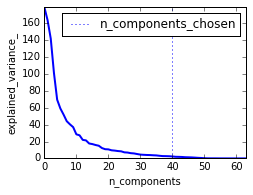

In [67]:
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

pca.fit(X_digits)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, logistic__C=Cs))
estimator.fit(X_digits, y_digits)
plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
           linestyle=':', label='n_components_chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [69]:
X_digits.shape

(1797, 64)

### Demo: Face recognition with eigenfaces

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time


In [84]:
# load data
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print "Total data size:"
print "n_samples: %d" % n_samples
print "n_features: %d" % n_features
print "n_classes: %d" % n_classes

Total data size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [86]:
# split data into train set and set set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print X_train.shape, y_train.size
print X_test.shape, y_test.size

(966, 1850) 966
(322, 1850) 322


In [94]:
# compute a PCA on the face dataset
n_components = 150
print "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
t0 = time()
pca = decomposition.PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
print "done in %0.3fs" % (time() - t0)

eigenfaces = pca.components_.reshape(n_components, h, w)
print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print "done in %0.3fs" % (time() - t0)
print X_train_pca.shape, X_test_pca.shape

Extracting the top 150 eigenfaces from 966 faces
done in 0.184s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.016s
(966, 150) (322, 150)


In [97]:
# Train a SVM classification model
print "Fitting the classifier to the training set"
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
             'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0,1]}
clf = GridSearchCV(svm.SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf.fit(X_train_pca, y_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_

Fitting the classifier to the training set
done in 22.390s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [98]:
# Quantitative evaluation of the model quality on the test set
t0 = time()
y_pred = clf.predict(X_test_pca)
print "done in %0.3fs" % (time() - t0)
print classification_report(y_test, y_pred, target_names=target_names)
print confusion_matrix(y_test, y_pred, labels=range(n_classes))

done in 0.041s
                   precision    recall  f1-score   support

     Ariel Sharon       0.53      0.69      0.60        13
     Colin Powell       0.77      0.85      0.81        60
  Donald Rumsfeld       0.65      0.63      0.64        27
    George W Bush       0.87      0.86      0.87       146
Gerhard Schroeder       0.75      0.72      0.73        25
      Hugo Chavez       0.73      0.53      0.62        15
       Tony Blair       0.82      0.75      0.78        36

      avg / total       0.80      0.80      0.79       322

[[  9   0   3   1   0   0   0]
 [  3  51   0   5   0   1   0]
 [  2   2  17   6   0   0   0]
 [  2   9   5 126   2   1   1]
 [  0   1   0   1  18   1   4]
 [  0   3   0   2   1   8   1]
 [  1   0   1   4   3   0  27]]


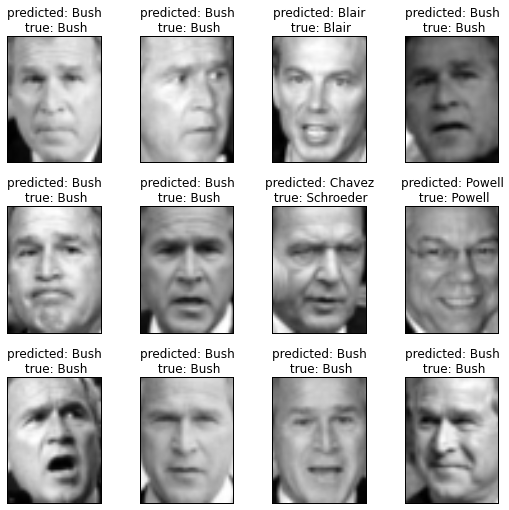

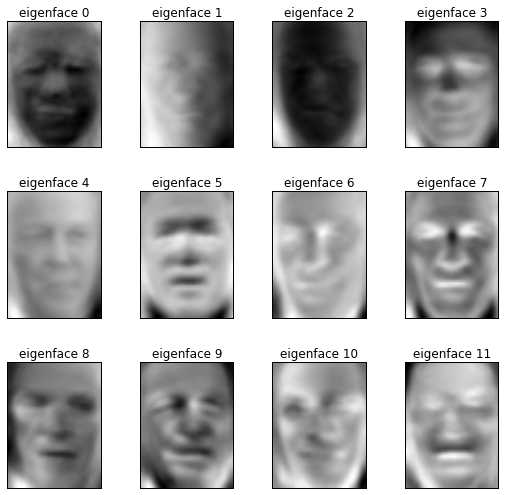

In [100]:
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """"Helper function to plot a gallery of portaits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# plot the result of the pridiction on a portion of the test set
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return "predicted: %s\n true: %s" % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i) 
                     for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenface
eigenface_titles = ['eigenface %d' % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()